In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

<Axes: xlabel='length', ylabel='dwt'>

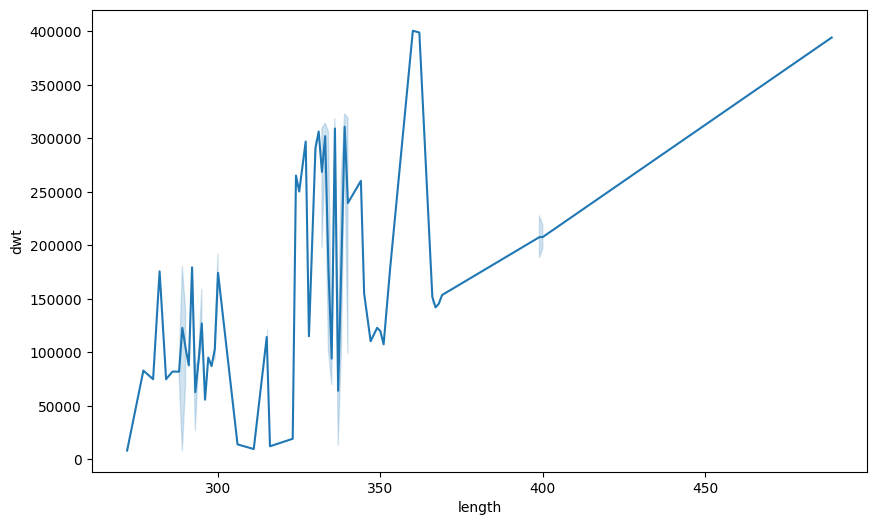

In [4]:
file = pd.read_csv("Cleaned_ships_data.csv")
df = file.groupby(by = "dwt") ["length"].mean().reset_index()
plt.figure(figsize=(10,6))
sb.lineplot(x="length", y="dwt", data=df)

<Axes: xlabel='ship_name', ylabel='count'>

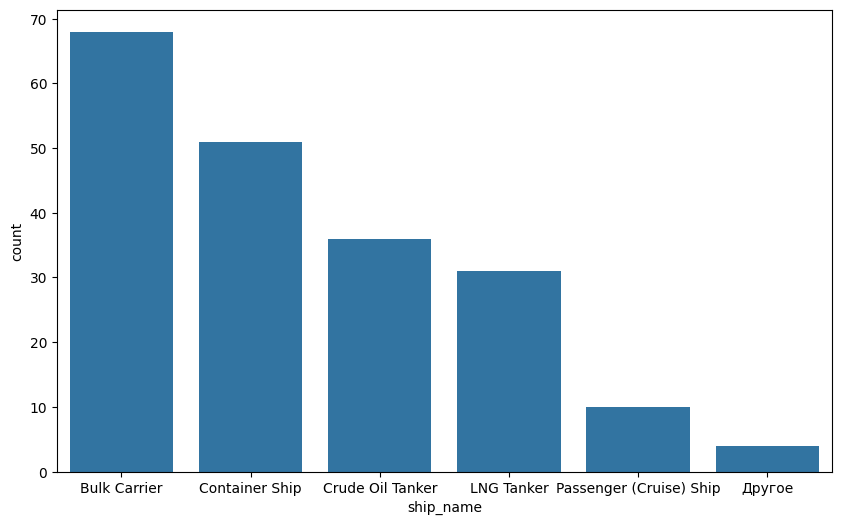

In [5]:
counts=file["ship_name"].value_counts()
min_amount = 10
df = file["ship_name"].apply(lambda x: "Другое" if counts[x] < min_amount else x).value_counts().reset_index()
plt.figure(figsize=(10,6))
sb.barplot(x="ship_name", y="count", data=df)


<Axes: xlabel='built_year', ylabel='count'>

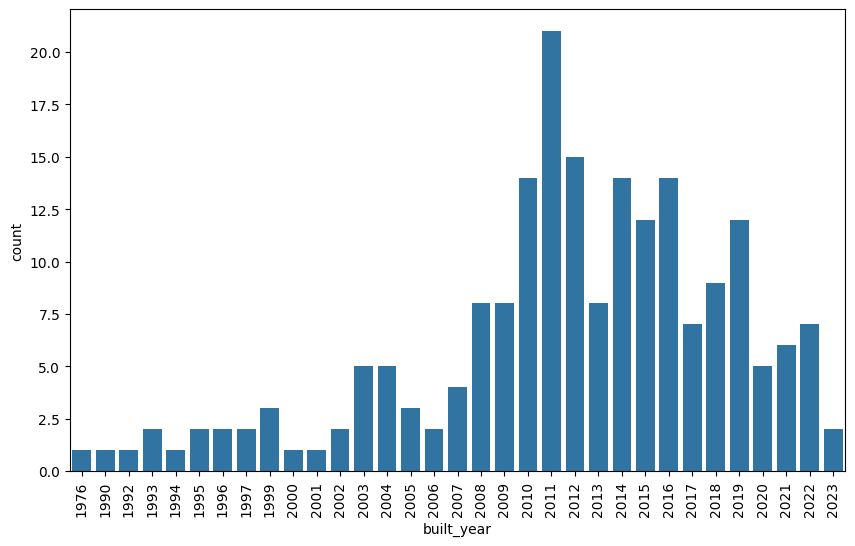

In [6]:
df = file["built_year"].value_counts().reset_index()
plt.figure(figsize=(10,6))
plt.xticks(rotation = 90)
sb.barplot(x="built_year", y="count", data=df)

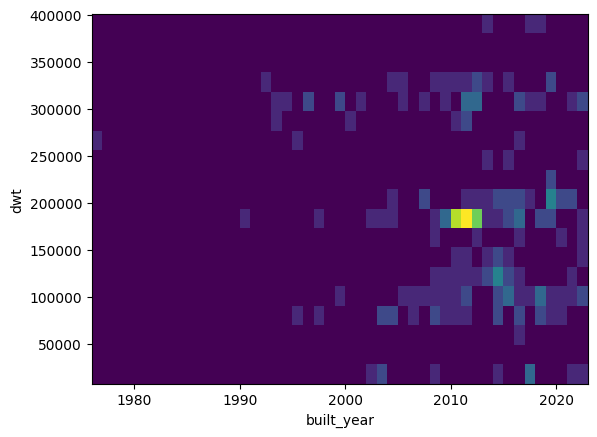

In [7]:
df = file[["built_year", "ship_name", "dwt"]]
dwt_bins = np.linspace(df['dwt'].min(), df['dwt'].max(), 20)
plt.hist2d(df["built_year"], df["dwt"], bins=[np.arange(df["built_year"].min(), df["built_year"].max() + 1), dwt_bins], cmap="viridis")
plt.xlabel("built_year")
plt.ylabel("dwt")
plt.show()

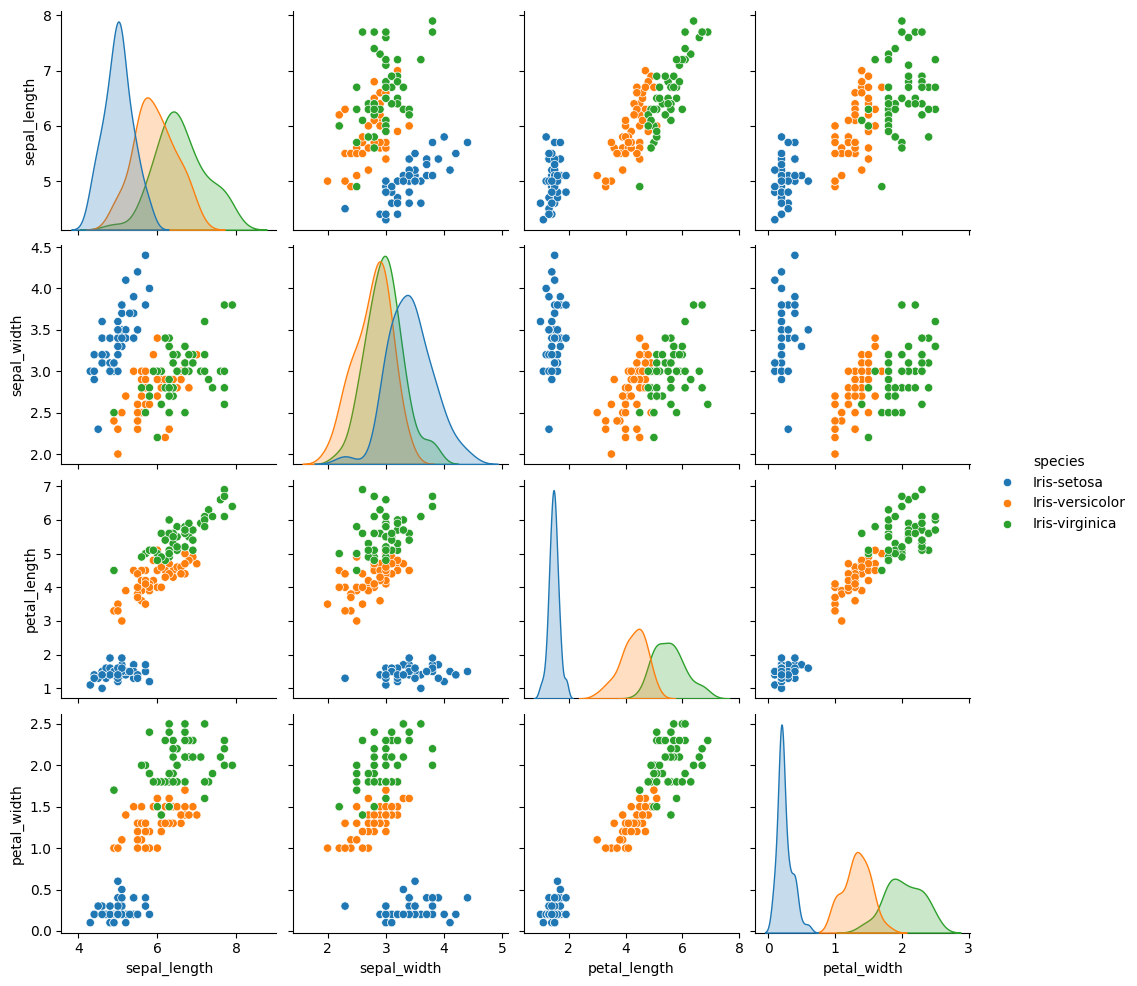

In [8]:
file2 = pd.read_csv("IRIS.csv")
sb.pairplot(file2, hue="species")

<Axes: xlabel='species', ylabel='sepal_length'>

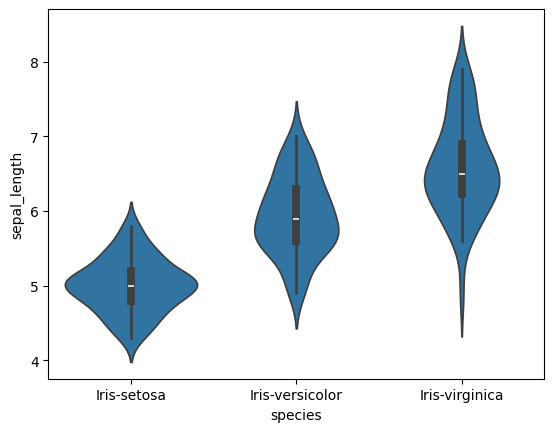

In [9]:
sb.violinplot(file2, x = file2.columns[4], y = file2.columns[0])

<Axes: xlabel='species', ylabel='sepal_width'>

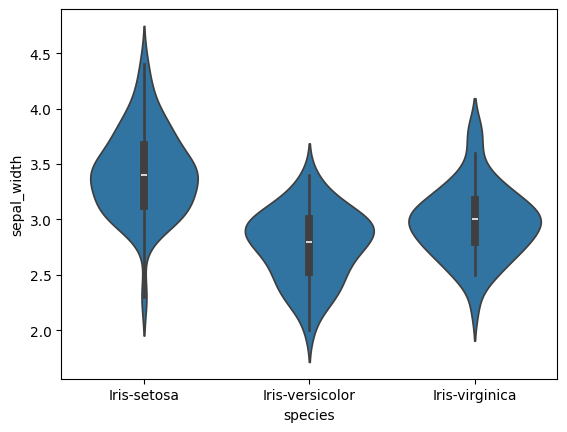

In [10]:
sb.violinplot(file2, x = file2.columns[4], y = file2.columns[1])

<Axes: xlabel='species', ylabel='petal_length'>

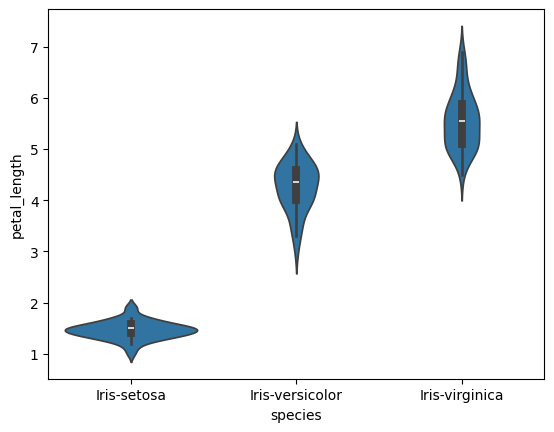

In [11]:
sb.violinplot(file2, x = file2.columns[4], y = file2.columns[2])

<Axes: xlabel='species', ylabel='petal_width'>

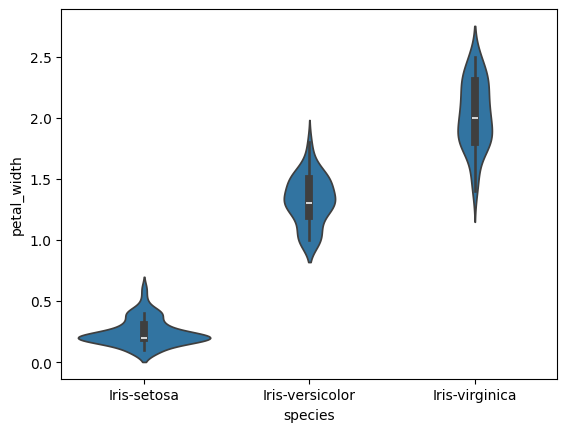

In [12]:
sb.violinplot(file2, x = file2.columns[4], y = file2.columns[3])

<Axes: title={'center': 'Зависимость побед от нанесенного урона'}, xlabel='Нанесенный урон', ylabel='Кол-во побед'>

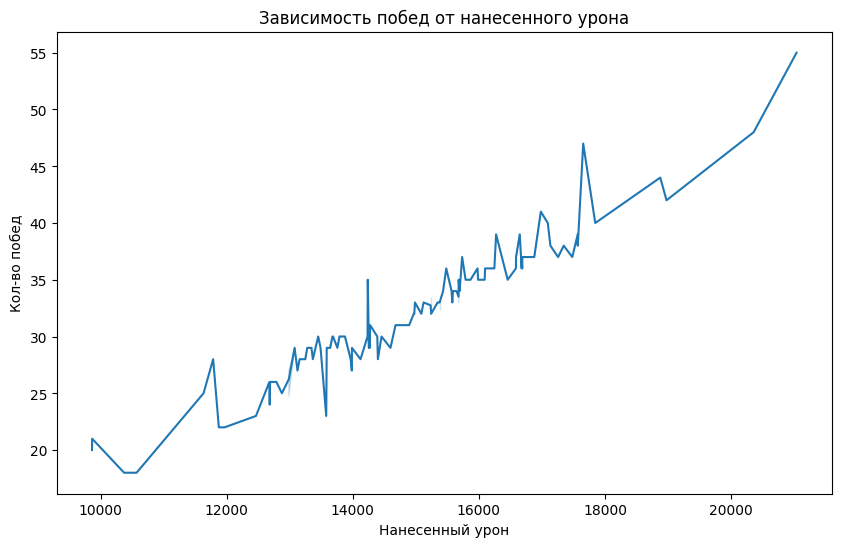

In [18]:
file3 = pd.read_csv("Pubg_Stats.csv")
plt.figure(figsize=(10,6))
plt.title("Зависимость побед от нанесенного урона")
plt.xlabel("Нанесенный урон")
plt.ylabel("Кол-во побед")
sb.lineplot(data = file3, x = "Damage_Dealt", y = "Wins")

Исходя из этого графика, можно сделать вывод, что чем больше урона нанесет игрок тем выше шанс победить в игре.

<Axes: title={'center': 'Зависимость побед от ранга'}, xlabel='Ранг', ylabel='Кол-во побед'>

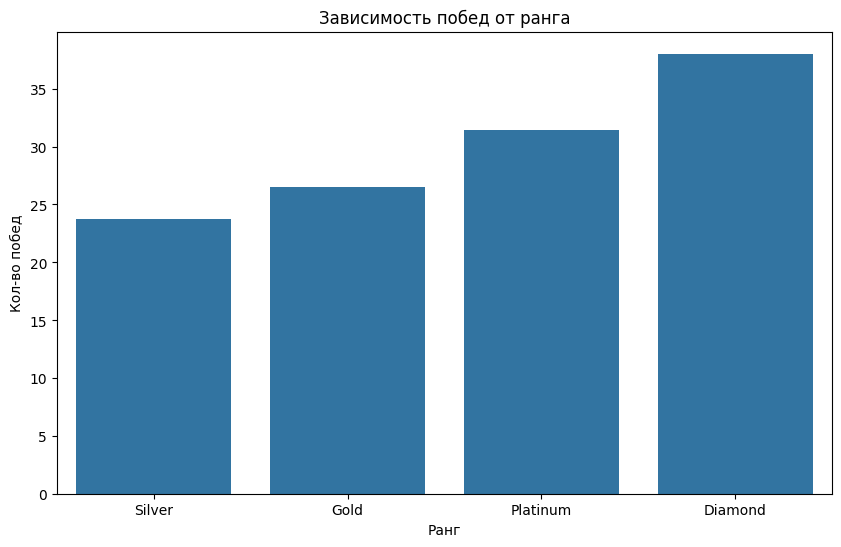

In [35]:
plt.figure(figsize=(10,6))
plt.title("Зависимость побед от ранга")
plt.xlabel("Ранг")
plt.ylabel("Кол-во побед")
sb.barplot(data = file3, x = "Rank", y = "Wins", order=['Silver', 'Gold', 'Platinum', 'Diamond'], errorbar=None)

Кол-во побед напрямую зависит от ранга, соответсвенно от скилла(в целом очевидно, но надо было проврить)

<Figure size 1000x600 with 0 Axes>

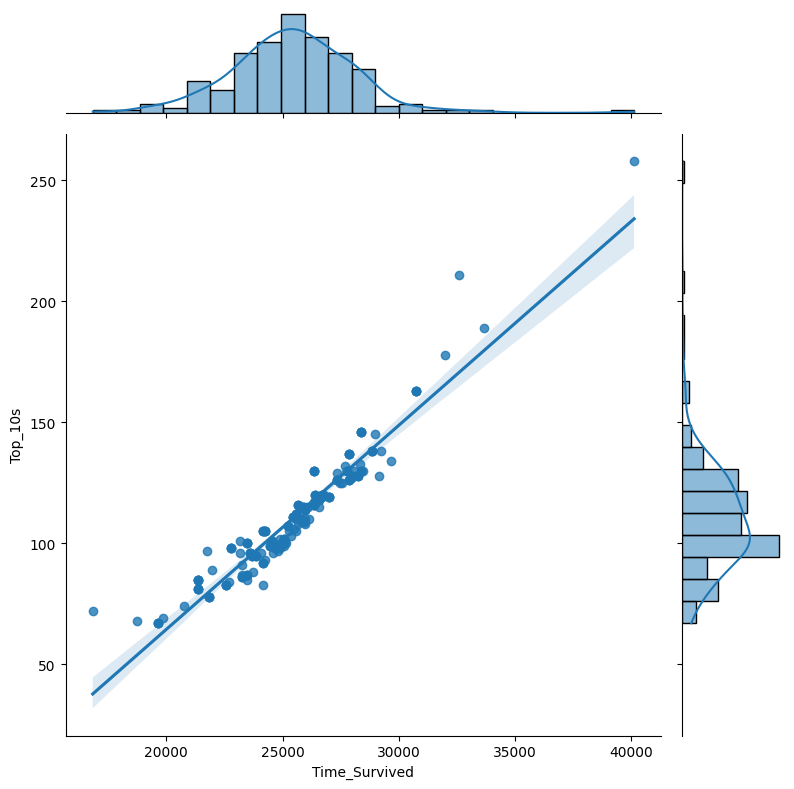

<Figure size 1000x600 with 0 Axes>

In [60]:
sb.jointplot(x="Time_Survived", y="Top_10s", data=file3, kind="reg", height=8)
plt.figure(figsize=(10,6))

Здесь можно заметить, что в начале пути, игроки занимают топ-10 чаще чем те, кто уже отыграл какое то время, но потом тенденция роста - чем больше времени выжил, тем чаще занимал топ-10.